# KMeans clustering algorithm and its application in segmentation:-

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
rand_data = pd.DataFrame(10*np.random.rand(100,2))
rand_data.head()


,0,1
0,7.172972,2.396085
1,1.547389,7.419691
2,7.587693,8.829791
3,7.257081,2.359146
4,3.169668,4.176557


In [81]:
rand_data.columns = {'X':0, 'Y':1}  # rand_data.columns = ["X" , "Y"]
rand_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   Y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [82]:
rand_data.head()

,X,Y
0,7.172972,2.396085
1,1.547389,7.419691
2,7.587693,8.829791
3,7.257081,2.359146
4,3.169668,4.176557


In [83]:
rand_data.shape

(100, 2)

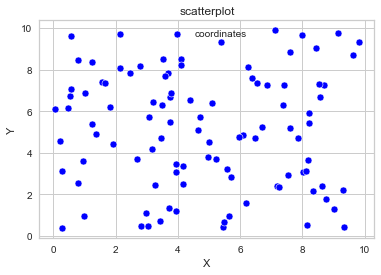

In [84]:
plt.figure(figsize = (6,4))
sns.scatterplot(x = rand_data["X"], y = rand_data["Y"] , color = 'blue', label = 'coordinates')
plt.title("scatterplot")
#plt.xlim(-10,10)
#plt.ylim(-10 ,10)
plt.legend()
plt.show()

In [85]:
from sklearn.cluster import KMeans

In [86]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(rand_data)


KMeans(n_clusters=4)

In [87]:
labels = kmeans.labels_   # label each data point to diff clusters indexed as 0,1,2,3

In [88]:
centers = kmeans.cluster_centers_  # centroid of each cluster
centers

array([[7.79213092, 7.94963813],
       [7.06034187, 2.83408899],
       [2.57454468, 2.49201518],
       [2.53704684, 7.0819867 ]])

In [89]:
rand_data["cl_labels"] = labels
rand_data.head()

,X,Y,cl_labels
0,7.172972,2.396085,1
1,1.547389,7.419691,3
2,7.587693,8.829791,0
3,7.257081,2.359146,1
4,3.169668,4.176557,2


In [90]:
cl_df = rand_data.groupby("cl_labels") 
cl_df.mean()       # gives the centroid of each clusters

,X,Y
cl_labels,,
0,7.792131,7.949638
1,7.060342,2.834089
2,2.574545,2.492015
3,2.537047,7.081987


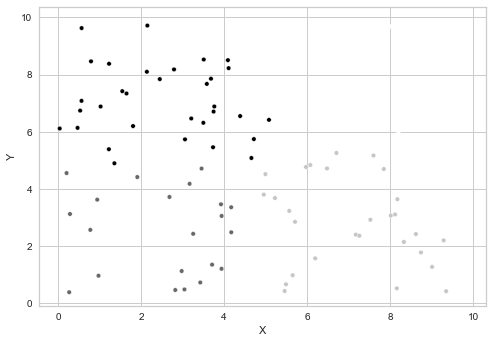

In [91]:
sns.scatterplot(x = rand_data["X"], y = rand_data["Y"] , s = 20, c = labels.astype(np.float), alpha = 1)
plt.show()

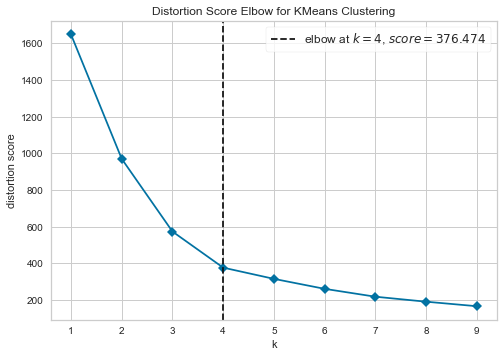

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [92]:
#import KElbowVisualiser from yellowbrick
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model , k = (1,10), timings = False)
visualizer.fit(rand_data)
visualizer.show()
# KElbowVisualizer gives us the graph bw k and wcss .K inc.wcss decreases
# Idea is to low inertia and low k 

In [93]:
import os
path = r"C:\Users\rishav jha\Downloads\Iris.csv"
os.path.exists(path)

True

In [94]:
df = pd.read_csv(path)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [95]:
df.info() # There is no null data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [96]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
df1 = df.drop('Species', axis = 1)


In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_for_kmeans = pd.DataFrame(scaler.fit_transform(df.iloc[:,:5]))
df_for_kmeans.columns = df.iloc[:,:5].columns
df_for_kmeans
#visualizer = KElbowVisualizer(KMeans(), k = (1,10))
#visualizer.fit(df1)
#visualizer.poof

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.000000,0.222222,0.625000,0.067797,0.041667
1,0.006711,0.166667,0.416667,0.067797,0.041667
2,0.013423,0.111111,0.500000,0.050847,0.041667
3,0.020134,0.083333,0.458333,0.084746,0.041667
4,0.026846,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...,...
145,0.973154,0.666667,0.416667,0.711864,0.916667
146,0.979866,0.555556,0.208333,0.677966,0.750000
147,0.986577,0.611111,0.416667,0.711864,0.791667
148,0.993289,0.527778,0.583333,0.745763,0.916667


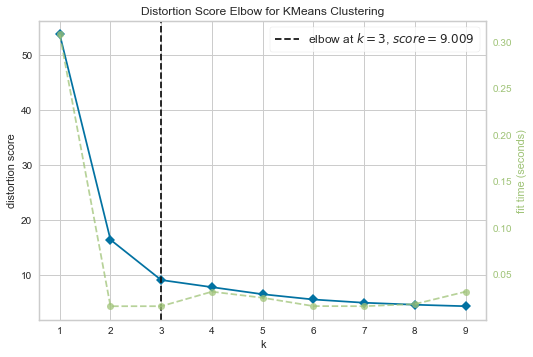

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [98]:
visualizer = KElbowVisualizer(KMeans(), k = (1,10))
visualizer.fit(df_for_kmeans)
visualizer.show()

In [99]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_for_kmeans)

KMeans(n_clusters=3)

In [100]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [101]:
kmeans.cluster_centers_

array([[0.16442953, 0.19611111, 0.59083333, 0.07864407, 0.06      ],
       [0.84235328, 0.6536643 , 0.41932624, 0.77893978, 0.81117021],
       [0.51297961, 0.44863732, 0.31367925, 0.55836265, 0.51965409]])

In [102]:
df["labelsk"] = labels
df["labelsk"].value_counts()
#df_for_kmeans.groupby("labelsk").mean()

2    53
0    50
1    47
Name: labelsk, dtype: int64

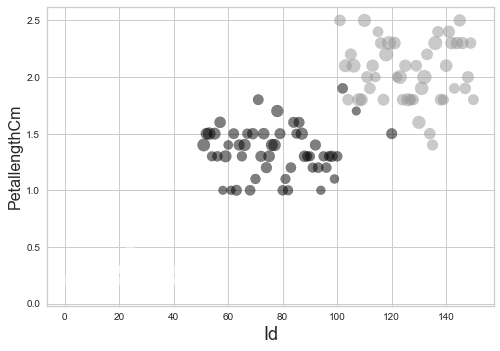

In [103]:
area = np.pi * ( df.iloc[:, 1])**2  
plt.scatter(df.iloc[:, 0], df.iloc[:, 4], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Id', fontsize=18)
plt.ylabel('PetallengthCm', fontsize=16)

plt.show()


<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

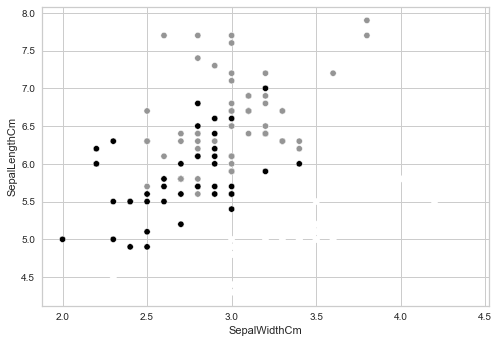

In [104]:
sns.scatterplot(x = df["SepalWidthCm"] , y = df["SepalLengthCm"] , s = 40 , c = labels.astype(np.int), alpha = 1)

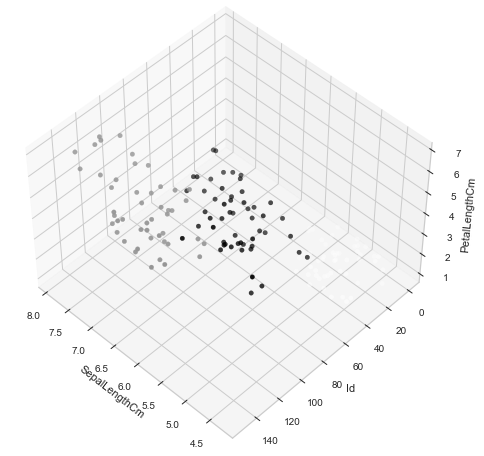

In [105]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('Id')
ax.set_zlabel('PetalLengthCm')

ax.scatter(df.iloc[:, 1], df.iloc[:, 0], df.iloc[:, 3], c= labels.astype(np.float))
